# 1. 导入所需要的的第三方数据库

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.datasets import load_boston

# 2. 导入sklearn库中的波士顿房价数据

In [3]:
boston = load_boston()
X = boston.data
y = boston.target

# 3. 进行标准化处理，返回值为标准化后的数据

In [4]:
from sklearn.preprocessing import StandardScaler
 
StandardScaler().fit_transform(X)

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

# 4. 进行区间缩放，返回值为缩放到[0, 1]区间的数据

In [5]:
from sklearn.preprocessing import MinMaxScaler
 
MinMaxScaler().fit_transform(X)

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

# 5. 进行归一化处理，返回值为归一化后的数据

In [6]:
from sklearn.preprocessing import Normalizer

Normalizer().fit_transform(X)

array([[1.26388341e-05, 3.59966795e-02, 4.61957387e-03, ...,
        3.05971776e-02, 7.93726783e-01, 9.95908132e-03],
       [5.78529889e-05, 0.00000000e+00, 1.49769546e-02, ...,
        3.77071843e-02, 8.40785474e-01, 1.93620036e-02],
       [5.85729947e-05, 0.00000000e+00, 1.51744622e-02, ...,
        3.82044450e-02, 8.43137761e-01, 8.64965806e-03],
       ...,
       [1.23765824e-04, 0.00000000e+00, 2.43009593e-02, ...,
        4.27762066e-02, 8.08470305e-01, 1.14884669e-02],
       [2.24644719e-04, 0.00000000e+00, 2.44548909e-02, ...,
        4.30471676e-02, 8.06519433e-01, 1.32831260e-02],
       [9.69214289e-05, 0.00000000e+00, 2.43887924e-02, ...,
        4.29308164e-02, 8.11392431e-01, 1.61092778e-02]])

# 6. 通过迭代找出最佳的eps以及min_samples数值

In [7]:
res = []
for eps in np.arange(40,62,2):
    for min_samples in range(5,15):
        dbscan = cluster.DBSCAN(eps = eps, min_samples = min_samples)
        dbscan.fit(X)
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats})
       
df = pd.DataFrame(res)
df
df.loc[df.n_clusters == 3, :]

,eps,min_samples,n_clusters,outliners,stats
0,40,5,3,22,[356 96 32]
2,40,7,3,26,[352 96 32]
3,40,8,3,28,[351 95 32]
4,40,9,3,28,[351 95 32]
10,42,5,3,21,[356 96 33]
...,...,...,...,...,...
105,60,10,3,11,[359 102 34]
106,60,11,3,11,[359 102 34]
107,60,12,3,12,[359 102 33]
108,60,13,3,12,[359 102 33]


# 7. 根据最佳eps及min_samples，使用DBSCAN模型对数据进行拟合并将标签加入数据集中

In [8]:
dbscan = cluster.DBSCAN(eps = 60, min_samples = 5)
dbscan.fit(X)
boston['dbscan_label'] = dbscan.labels_

# 8. 通过对不同特征进行作图看出特征之间的关系

E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-package

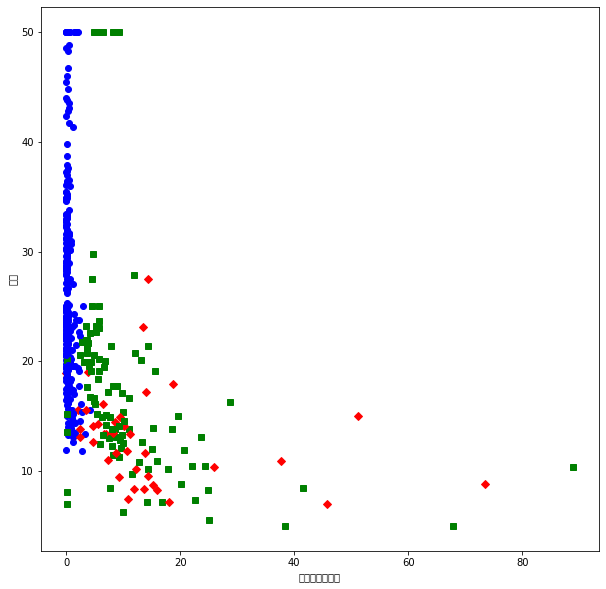

In [9]:
plt.figure(figsize=(10,10)) 
colors = ['b', 'g', 'r'] 
markers = ['o', 's', 'D']
for i,l in enumerate(dbscan.labels_): 
     plt.plot(X[i][0],y[i],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("城镇人均犯罪率")
plt.ylabel("房价")
plt.show()

E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23429 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-package

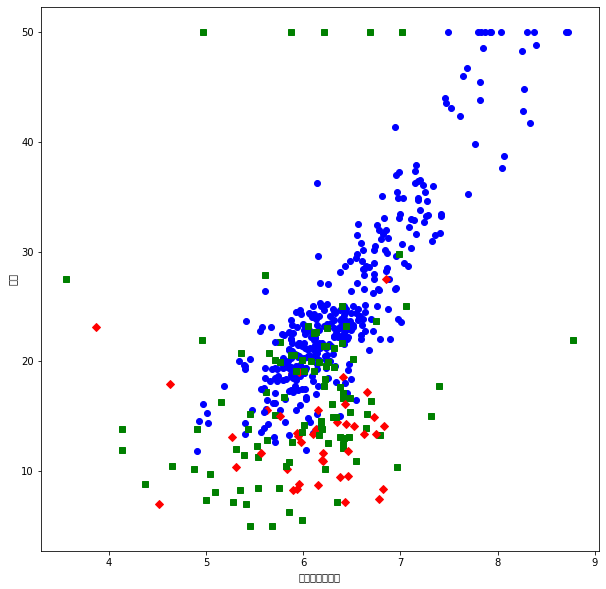

In [10]:
plt.figure(figsize=(10,10)) 
colors = ['b', 'g', 'r'] 
markers = ['o', 's', 'D']
for i,l in enumerate(dbscan.labels_): 
     plt.plot(X[i][5],y[i],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("住宅平均房间数")
plt.ylabel("房价")
plt.show()

E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-package

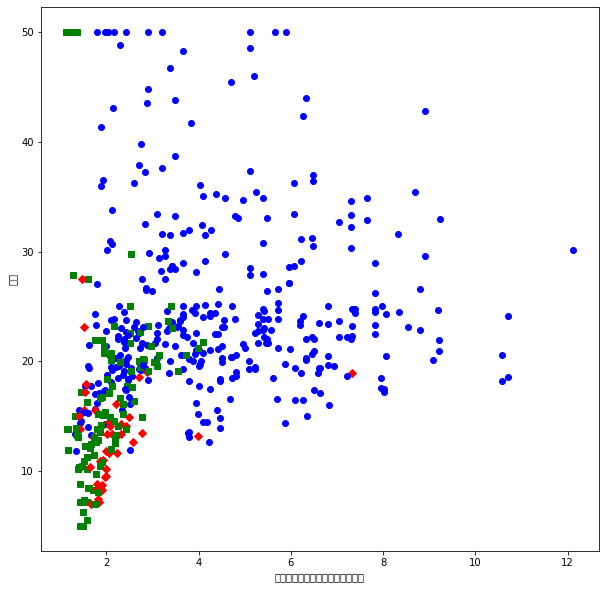

In [11]:
plt.figure(figsize=(10,10)) 
colors = ['b', 'g', 'r'] 
markers = ['o', 's', 'D']
for i,l in enumerate(dbscan.labels_): 
     plt.plot(X[i][7],y[i],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("到波士顿五个中心区域的加权距离")
plt.ylabel("房价")
plt.show()